#### This report has been done by Sergio Cárdenas and Armand de Asís

# INFORMATION VISUALIZATION LAB: SECOND PRACTICAL WORK

# 0.Data preprocessing
Even though preprocessing was explained in the last report, we applied some changes to the procedure to make a better database, so preprocessing will also be included in this report.

First, we have to preprocess the data as much of it has some errors or difficulties that we must correct to make suitable visualization. We will use *OpenRefine* and then *Python* (we considered that the use of lists and Pandas data frames make this preprocessing easier, especially for the data augmentation part.

## 0.1. OpenRefine Preprocessing

The first part of the preprocessing is done using *OpenRefine* software. We will show some screenshots and the procedure we have followed to obtain the preprocessed dataset.


We started by downloading the given *.zip* file and uploading the *.txt* file to *OpenRefine* so preprocessing can be done.

___


### 0.1.1 Data exploration

We first parsed data as a separator-based file using ';' and *UTF-8* encoding, taking into account that the first line contains the column titles (separated by "). We have seen that some characters, such as accent marks, are represented as question marks, but this is a problem of the original file and will not be relevant to our task.

___

### 0.1.2 Data wrangling 

To start our *OpenRefine* project, we sort by number in increasing value of the *ID_ARTICLE* column. Now, we select the *GRUP DE RECERCA UPC* column, *Edit cells* and *Cluster and edit...* to check that all names are different and well-written. We do the same to the *DEPARTAMENT UPC* column and see that there is no problem for any of them. We sort alphabetically the columns *DEPARTAMENT UPC* and *GRUP DE RECERCA UPC* and apply changes.

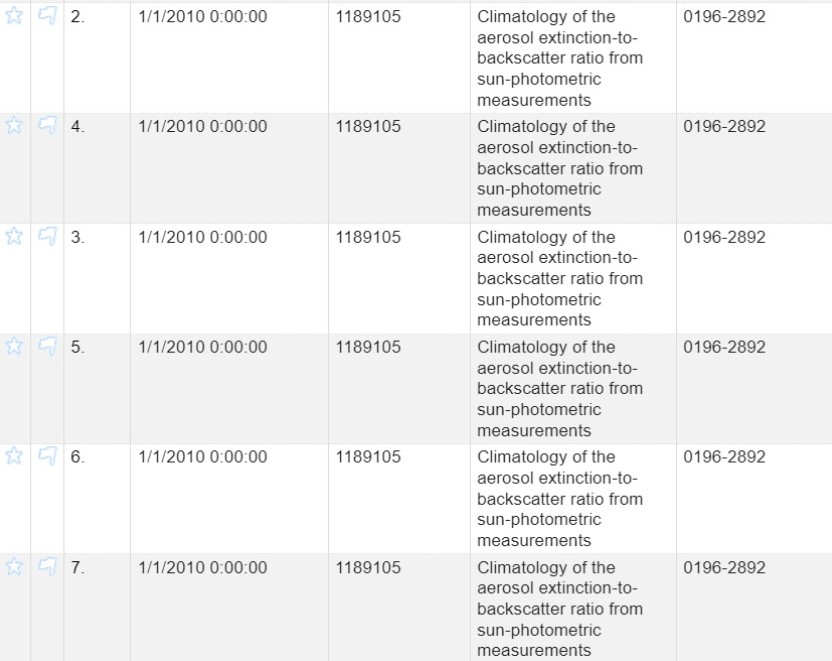
___

### 0.1.3 Data imputation

We now fill down columns *DEPARTAMENT UPC* and *GRUP DE RECERCA UPC* to avoid missing values in these columns. There are other columns with the same problem, like *ÀMBIT CONEIXEMENT DE LA REVISTA*, but as they will not be relevant to our task we decided to ignore them.

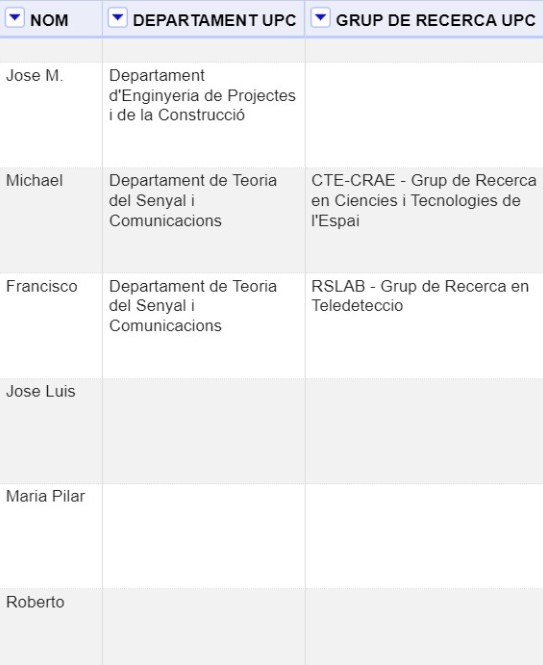
___

### 0.1.4 Data augmentation

Knowing each *DEPARTAMENT UPC* acronym will be useful for our task, so we will now create a column to store them. For that, we select *Add column based on this column...* in *DEPARTAMENT UPC* and apply the following code. 

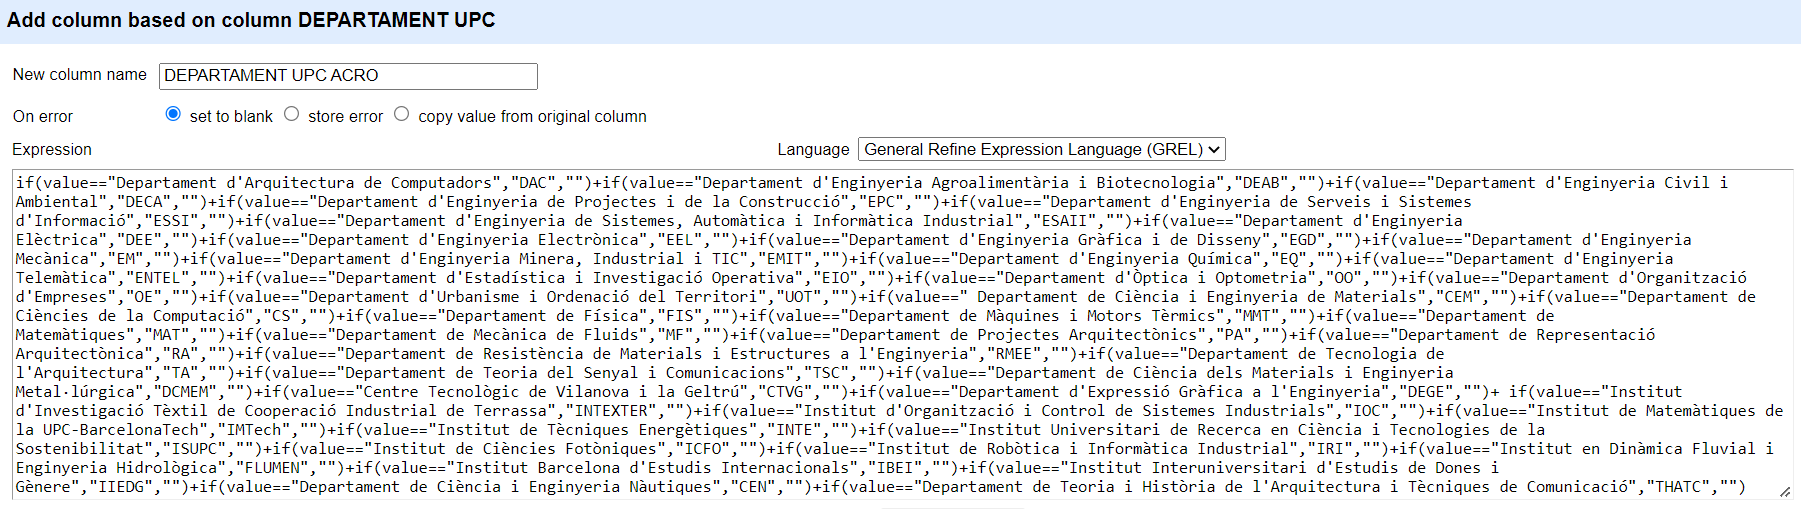




If we observe this new column, we can see that there are 345 blank values. These represent papers that are not published by recognised departments from UPC and, taking into account that the number of papers published for each one is very low, their rows can be deleted. So we select *Blank values per column* in the *Facet* option of the *All* column, mark the acronyms column and select *Remove matching rows* from *Edit rows* in the *All* column to finally remove them.

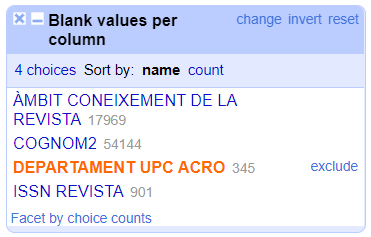

Finally, we export the *.csv* file separated by ','.

___

## 0.2. Python importation and Preprocessing

As the visualizations are done with *Altair* (a *Python* library) we need to import the *.csv* file generated with *Open Refine* and apply some changes to be able to visualize it properly. First, we declare some libraries. We also delete the upper bound of *Altair* entries to be able to plot some large graphics.

In [1]:
#IMPORTS
!pip install geopandas
import pandas as pd
import altair as alt
import os
import pprint
import geopandas as gpd
alt.data_transformers.disable_max_rows() #we delete the upper bound of entries in altair

DataTransformerRegistry.enable('default')

### 0.2.1. CSV importation

Now, we import the *.csv* file into a *Pandas* data frame using the current local system.

In [2]:
archive_path = str(os.getcwd())
df = pd.read_csv (archive_path+'\\processed-data.csv') # we read the csv from our drive and we store it as a Pandas df

We print the head of this dataframe to see if everything is correctly imported.

In [3]:
df.head()

,DATA PUBLICACIO,ID_ARTICLE,TITOL ARTICLE,ISSN REVISTA,TITOL REVISTA,ÀMBIT CONEIXEMENT DE LA REVISTA,ID_AUTOR,COGNOM1,COGNOM2,NOM,DEPARTAMENT UPC,DEPARTAMENT UPC ACRO,GRUP DE RECERCA UPC
0,1/1/2010 0:00:00,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,178661,Alonso,Perez de Agreda,Eduardo,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques
1,1/1/2010 0:00:00,638145,Fast planar slides. A closed-form thermo-hydro...,0363-9061,International journal for numerical and analyt...,Computational Mechanics,182365,Pinyol,Puigmarti,Nuria Merce,Departament d'Enginyeria Civil i Ambiental,DECA,MSR - Mecanica del Sols i de les Roques
2,1/1/2010 0:00:00,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181357,Domingo,Aladren,Maria Del Carmen,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...
3,1/1/2010 0:00:00,646053,An Interaction Model for QoS Support in Ad Hoc...,1741-1084,International journal of wireless and mobile c...,Computer Science (miscellaneous),181525,Remondo,Bueno,David,Departament d'Enginyeria Telemàtica,ENTEL,BAMPLA - Disseny i Avaluacio de Xarxes i Serve...
4,1/1/2010 0:00:00,667189,Ergonomic design applied in a sugar mill inter...,0327-0793,Latin american applied research,Chemical Engineering (miscellaneous),182646,Amante,Garcia,Beatriz,Departament d'Enginyeria de Projectes i de la ...,EPC,ENMA - Enginyeria del Medi Ambient


Afterwards, we check that the types of data in the columns are correct.

In [4]:
print(df.columns)
print(df.dtypes)

Index(['DATA PUBLICACIO', 'ID_ARTICLE', 'TITOL ARTICLE', 'ISSN REVISTA',
       'TITOL REVISTA', 'ÀMBIT CONEIXEMENT DE LA REVISTA', 'ID_AUTOR',
       'COGNOM1', 'COGNOM2', 'NOM', 'DEPARTAMENT UPC', 'DEPARTAMENT UPC ACRO',
       'GRUP DE RECERCA UPC'],
      dtype='object')
DATA PUBLICACIO                    object
ID_ARTICLE                          int64
TITOL ARTICLE                      object
ISSN REVISTA                       object
TITOL REVISTA                      object
ÀMBIT CONEIXEMENT DE LA REVISTA    object
ID_AUTOR                            int64
COGNOM1                            object
COGNOM2                            object
NOM                                object
DEPARTAMENT UPC                    object
DEPARTAMENT UPC ACRO               object
GRUP DE RECERCA UPC                object
dtype: object


We can observe that some of them are not correctly imported, so we apply a type conversion for them.

In [5]:
df['DATA PUBLICACIO'] = pd.to_datetime(df['DATA PUBLICACIO'])
df['ID_ARTICLE'] = df['ID_ARTICLE'].astype('int64')
df['TITOL ARTICLE'] = df['TITOL ARTICLE'].astype('string')
df['ISSN REVISTA'] = df['ISSN REVISTA'].astype('string')
df['TITOL REVISTA'] = df['TITOL REVISTA'].astype('string')
df['ÀMBIT CONEIXEMENT DE LA REVISTA'] = df['ÀMBIT CONEIXEMENT DE LA REVISTA'].astype('category')
df['ID_AUTOR'] = df['ID_AUTOR'].astype('int64')
df['COGNOM1'] = df['COGNOM1'].astype('string')
df['COGNOM2'] = df['COGNOM2'].astype('string')
df['NOM'] = df['NOM'].astype('string')
df['DEPARTAMENT UPC'] = df['DEPARTAMENT UPC'].astype('category')
df['DEPARTAMENT UPC ACRO'] = df['DEPARTAMENT UPC ACRO'].astype('category')
df['GRUP DE RECERCA UPC'] = df['GRUP DE RECERCA UPC'].astype('category')

Now they are all well imported.

In [6]:
print(df.dtypes) 

DATA PUBLICACIO                    datetime64[ns]
ID_ARTICLE                                  int64
TITOL ARTICLE                              string
ISSN REVISTA                               string
TITOL REVISTA                              string
ÀMBIT CONEIXEMENT DE LA REVISTA          category
ID_AUTOR                                    int64
COGNOM1                                    string
COGNOM2                                    string
NOM                                        string
DEPARTAMENT UPC                          category
DEPARTAMENT UPC ACRO                     category
GRUP DE RECERCA UPC                      category
dtype: object


## 0.3 Data augmentation for 10 departments


### 0.3.1 Data selection for the 10 departments
From all the departments, we will select only ten departments to which we will augment the information to display in future visualizations. The information will be obtained using *futur.upc.edu* and *gpaq.upc.edu/lldades/*.

First, we will see all the departments available:



In [7]:
departments=df[['DEPARTAMENT UPC', 'DEPARTAMENT UPC ACRO']].drop_duplicates(subset=['DEPARTAMENT UPC ACRO'], keep='last').reset_index()
departments=departments[['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC']]
print(departments[['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC']])

   DEPARTAMENT UPC ACRO                                    DEPARTAMENT UPC
0                   IOC  Institut d'Organització i Control de Sistemes ...
1                  INTE                 Institut de Tècniques Energètiques
2                  ESSI  Departament d'Enginyeria de Serveis i Sistemes...
3                 ENTEL                Departament d'Enginyeria Telemàtica
4                    PA            Departament de Projectes Arquitectònics
5              INTEXTER  Institut d'Investigació Tèxtil de Cooperació I...
6                    OO                  Departament d'Òptica i Optometria
7                   IRI      Institut de Robòtica i Informàtica Industrial
8                 ESAII  Departament d'Enginyeria de Sistemes, Automàti...
9                   DEE                 Departament d'Enginyeria Elèctrica
10                  UOT  Departament d'Urbanisme i Ordenació del Territori
11                   RA        Departament de Representació Arquitectònica
12                   TA  

We can see that there are 34 departments in total. To select 10 of them, there are some things to take into account. First, we want the departments to be quite separated in terms of location, so the cluster will be avoided when creating the map. Moreover, we will use departments with accessible information, so data can be easily augmented. Finally, from the departments that match this criterion, we will select the ones with the most number of publications, as they are the most active departments that will offer more information and possibilities with data augmentation, allowing us to make the best of the visualization interactivity. 

Using the following list with all the locations we classified each department according to the mentioned criterion:

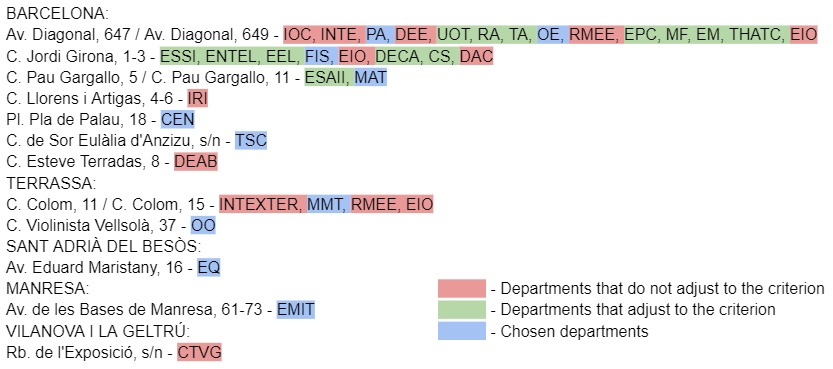

Taking this into account, these are the 10 departments that we are choosing:

In [8]:
depts_sel = ['PA', 'MAT', 'FIS', 'EQ', 'MMT', 'TSC', 'OO', 'EMIT', 'CEN', 'OE']
depts_sel

['PA', 'MAT', 'FIS', 'EQ', 'MMT', 'TSC', 'OO', 'EMIT', 'CEN', 'OE']

### 0.3.2. Data expansion of selected data

For the selected departments, we want to know the address, specifying the latitude and longitude, and the number of members, specifying how many of them are professors, researchers and support research personnel (PSR). The following information is extracted from the websites previously mentioned.

In [9]:
address = ['Av. Diagonal, 649, Barcelona', 'C. Pau Gargallo, 14, Barcelona', 'C. Jordi Girona, 1-3, Barcelona', 'Av. Eduard Maristany, 16, St. Adrià del Besòs', 'C. Colom, 11, Terrassa',
           "C. de Sor Eulàlia d'Anzizu, s/n, Barcelona", 'C. Violinista Vellsolà, 37, Terrassa', 'Av. de les Bases de Manresa, 61-73, Manresa', 'Pl. Pla de Palau, 18, Barcelona', 'Av. Diagonal, 647, Barcelona']
latitude = [41.38453284875446, 41.383475020607705, 41.38906916040639, 41.4146829219607, 41.56329854037812, 41.38919230116642, 41.56870324227447, 41.736779437713295, 41.38233138298673, 41.38482066700018]
longitude = [2.1135184272660426, 2.11582716948753, 2.112830125096235, 2.2230519257039134, 2.02390733135788, 2.112001939695014, 2.02377864722791, 1.8289716351690186, 2.1848498086136536, 2.115820536593728]
members_count = [138, 247, 272, 168, 53, 171, 64, 92, 45, 175]
prof_count = [131, 220, 207, 99, 41, 100, 58, 80, 45, 173]
res_count = [4, 15, 33, 46, 7, 38, 4, 2, 0, 1]
psr_count = [3, 12, 32, 23, 5, 33, 2, 10, 0, 1]

With that information, we can create a dataframe and add the full name of each department.

In [10]:
augmented_df = pd.DataFrame(list(zip(depts_sel, address, latitude, longitude, members_count, prof_count, res_count, psr_count)),
                      columns = ['DEPARTAMENT UPC ACRO', 'ADDRESS', 'LATITUDE', 'LONGITUDE', '#MEMBERS', '#PROFESSORS', '#RESEARCHERS', '#PSR'])
augmented_df = pd.merge(left=augmented_df, right=departments, on=['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC ACRO'], how='inner')
augmented_df

,DEPARTAMENT UPC ACRO,ADDRESS,LATITUDE,LONGITUDE,#MEMBERS,#PROFESSORS,#RESEARCHERS,#PSR,DEPARTAMENT UPC
0,PA,"Av. Diagonal, 649, Barcelona",41.384533,2.113518,138,131,4,3,Departament de Projectes Arquitectònics
1,MAT,"C. Pau Gargallo, 14, Barcelona",41.383475,2.115827,247,220,15,12,Departament de Matemàtiques
2,FIS,"C. Jordi Girona, 1-3, Barcelona",41.389069,2.112830,272,207,33,32,Departament de Física
3,EQ,"Av. Eduard Maristany, 16, St. Adrià del Besòs",41.414683,2.223052,168,99,46,23,Departament d'Enginyeria Química
4,MMT,"C. Colom, 11, Terrassa",41.563299,2.023907,53,41,7,5,Departament de Màquines i Motors Tèrmics
5,TSC,"C. de Sor Eulàlia d'Anzizu, s/n, Barcelona",41.389192,2.112002,171,100,38,33,Departament de Teoria del Senyal i Comunicacions
6,OO,"C. Violinista Vellsolà, 37, Terrassa",41.568703,2.023779,64,58,4,2,Departament d'Òptica i Optometria
7,EMIT,"Av. de les Bases de Manresa, 61-73, Manresa",41.736779,1.828972,92,80,2,10,"Departament d'Enginyeria Minera, Industrial i TIC"
8,CEN,"Pl. Pla de Palau, 18, Barcelona",41.382331,2.184850,45,45,0,0,Departament de Ciència i Enginyeria Nàutiques
9,OE,"Av. Diagonal, 647, Barcelona",41.384821,2.115821,175,173,1,1,Departament d'Organització d'Empreses


With that, all preprocessing is done and we can start making the visualizations.

# Exercise 1
The objective of this first exercise is to make: 
*   Visual comparison with detailed numbers (e.g., hover) of the number of publications along time of two departments that can be interactively selected, with a reference on the average publications of the whole group. Enhance such visualization so that the users can easily get insights (be creative, think of whether you are interested in periods where the publications have grown, or whether highest ranked (or lowest ranked) departments must be emphasized…).

This is a similar objective as the one solved in the last deliverable: "How have the different departments performed along the last years?". We need to observe the number of papers published by each department for the last few years. For that reason, papers will be grouped by department and year adding some insights if we want to compare two departments in two years. So we will start with the last graphic adding some interaction. 


## Exercise 1.1: Previous calculations
Before making the visualization, we need to extract the years from the publication date and add this information to the data frame.

In [11]:
df1 = df
years = []
for date in df['DATA PUBLICACIO']:
  years.append(date.year)
df1['ANYS'] = years

After that, we group papers by department and year and count them, dropping duplicate values.

In [12]:
df1 = df1.drop_duplicates(subset=['DEPARTAMENT UPC ACRO','ANYS','ID_ARTICLE'], keep='last').reset_index()
df1 = df1.groupby(['DEPARTAMENT UPC ACRO','ANYS'])['ID_ARTICLE'].count().reset_index(name='PUBLICACIONS')

We finally make an inner join to drop departments that are not in the top 10 and add the augmented data to this data frame.

In [13]:
df1_complete  = pd.merge(left=df1, right=augmented_df, on=['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC ACRO'], how='inner')
print(df1_complete)

    DEPARTAMENT UPC ACRO  ANYS  PUBLICACIONS  \
0                    CEN  2010            13   
1                    CEN  2011            24   
2                    CEN  2012             5   
3                    CEN  2013            11   
4                    CEN  2014            11   
..                   ...   ...           ...   
135                  TSC  2019           137   
136                  TSC  2020           132   
137                  TSC  2021           121   
138                  TSC  2022            77   
139                  TSC  2023             0   

                                        ADDRESS   LATITUDE  LONGITUDE  \
0               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
1               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
2               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
3               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
4               Pl. Pla de Palau, 18, Barcelona  41.382331

We will filter off the year 2023 as we did in the previous deliverable.

In [14]:
df1_complete = df1_complete.loc[df1_complete['ANYS'] <= 2022].reset_index()

Now we will compute max, min and average paper production values. 

In [15]:
mean_publications_per_year = []
max_publications = []
min_publications = []
year_max_publications = []
year_min_publications = []
for department in depts_sel:
    partial_df = df1_complete[df1_complete['DEPARTAMENT UPC ACRO'].str.match(department)]
    min_row = partial_df[partial_df['PUBLICACIONS']==partial_df['PUBLICACIONS'].min()]
    max_row = partial_df[partial_df['PUBLICACIONS']==partial_df['PUBLICACIONS'].max()]
    mean_publication = partial_df['PUBLICACIONS'].mean()

    mean_publications_per_year.append(int(mean_publication))
    max_publications.append(int(max_row['PUBLICACIONS'].tolist()[0]))
    min_publications.append(int(min_row['PUBLICACIONS'].tolist()[0]))
    year_max_publications.append(max_row['ANYS'].tolist())
    year_min_publications.append(min_row['ANYS'].tolist())
    
max_min_lookup = pd.DataFrame(list(zip(depts_sel, mean_publications_per_year, max_publications, year_max_publications, min_publications, year_min_publications)),
               columns =['DEPARTAMENT UPC ACRO', 'Mean publications per year','Max publications', 'Year max publications','Min publications', 'Year min publications'])

Now we can merge both tables and make the definitive one.

In [16]:
df1_complete = pd.merge(left=df1_complete, right=max_min_lookup, on=['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC ACRO'], how='inner').drop(labels = ["index"], axis = 1)
print(df1_complete)

    DEPARTAMENT UPC ACRO  ANYS  PUBLICACIONS  \
0                    CEN  2010            13   
1                    CEN  2011            24   
2                    CEN  2012             5   
3                    CEN  2013            11   
4                    CEN  2014            11   
..                   ...   ...           ...   
125                  TSC  2018           135   
126                  TSC  2019           137   
127                  TSC  2020           132   
128                  TSC  2021           121   
129                  TSC  2022            77   

                                        ADDRESS   LATITUDE  LONGITUDE  \
0               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
1               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
2               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
3               Pl. Pla de Palau, 18, Barcelona  41.382331   2.184850   
4               Pl. Pla de Palau, 18, Barcelona  41.382331

## Exercise 1.2: Visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfil, that is to compare quantities. The problem here is the great amount of data, which can lead us to clutter. For that, using a heatmap can be a good option.

In [17]:
base = alt.Chart(df1_complete).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC ACRO', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'))
    ).properties (
        title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
        width = 675,
        height = 352
    )

base

alt.Chart(...)

As in the last deliverable, this solves the answer as we can get a sense of how a department has evolved over the years by looking at its corresponding column. As more red the cell, more papers were produced by the department in that year. But the problem is present when we want to compare cells and get the exact numbers to make a more precise comparison. For this reason, now we will apply an interactive environment, declaring the actions (clicking and hovering) that we will use during all this project. 

In [18]:
click1 = alt.selection_multi(
    fields = ['DEPARTAMENT UPC ACRO'],
)

click2 = alt.selection_multi(
    fields = ['DEPARTAMENT UPC ACRO'],
    empty='none'
)

hover = alt.selection_single(
    on='mouseover',
    empty='none'
)

In [19]:
base = alt.Chart(df1_complete).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC ACRO', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.condition(click1, alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 12, labelFontSize=12)), alt.value('lightgray'))
    ).properties (
        title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=18),
        width = 675,
        height = 352
    )

base.interactive().add_selection(click1)

alt.Chart(...)

Now we could add some greyscale to avoid losing the evolution if we select one element.

In [20]:
base = alt.Chart(df1_complete).mark_rect(
    ).encode(
    x=alt.X('DEPARTAMENT UPC ACRO', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color=alt.condition(click1, alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 12, labelFontSize=12)), alt.value('grey')),
    opacity = alt.condition(click1, alt.value(1), alt.Opacity('PUBLICACIONS:Q'))
    ).properties (
        title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
        width = 675,
        height = 352
    )

base.interactive().add_selection(click1)

alt.Chart(...)

Now we will add specific additional information about the selected elements as the max, min and average paper production per department, the whole department name and the years where they have been performing better. 

In [21]:
base = alt.Chart(df1_complete).mark_rect().encode(
    x=alt.X('DEPARTAMENT UPC ACRO', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
).properties (
        title=alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
        width = 675,
        height = 352
)

chart = base.encode(
    color=alt.condition(click1, alt.Color('PUBLICACIONS:Q',
              title='Number of publications',
              scale=alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 12, labelFontSize=12)), alt.value('grey')),
    opacity = alt.condition(click1, alt.value(1), alt.Opacity('PUBLICACIONS:Q')),
    ).add_selection(
      click1
    )

overlay = base.encode(
    x=alt.X('DEPARTAMENT UPC ACRO:N'),
    y=alt.Y('ANYS:O'),
    tooltip = [alt.Tooltip('DEPARTAMENT UPC'), alt.Tooltip('Mean publications per year'), alt.Tooltip('Max publications'),
            alt.Tooltip('Min publications'), alt.Tooltip('Year max publications'),alt.Tooltip('Year min publications')],
    opacity = alt.value(0),
    ).transform_filter(
        click1
    )


vis1 = chart + overlay

vis1.interactive()

alt.LayerChart(...)

Now we add text to cells to make the information clearer and make an exact comparison, so we do not put it on the tooltip. 

In [22]:
base = alt.Chart(df1_complete).mark_rect().encode(
    x = alt.X('DEPARTAMENT UPC ACRO', title='UPC Departments', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y = alt.Y('ANYS:O', title='Years', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
).properties (
        title = alt.TitleParams("Number of publications per UPC department during the last years",fontSize=16),
        width = 675,
        height = 352
)

chart = base.encode(
    color = alt.condition(click1, alt.Color('PUBLICACIONS:Q',
              title = 'Number of publications',
              scale = alt.Scale(scheme='yelloworangered'), legend = alt.Legend(titleFontSize = 12, labelFontSize=12)), alt.value('grey')),
    opacity = alt.condition(click1, alt.value(1), alt.Opacity('PUBLICACIONS:Q', legend=None)),
    )

overlay = base.encode(
    x = alt.X('DEPARTAMENT UPC ACRO:N'),
    y = alt.Y('ANYS:O'),
    tooltip = [alt.Tooltip('DEPARTAMENT UPC'), alt.Tooltip('Mean publications per year'), alt.Tooltip('Max publications'),
            alt.Tooltip('Min publications'), alt.Tooltip('Year max publications'),alt.Tooltip('Year min publications')],
    opacity = alt.value(0),
)

# Configure text
text = alt.Chart(df1_complete).mark_text(baseline='middle').encode(
    x = alt.X('DEPARTAMENT UPC ACRO:N'),
    y = alt.Y('ANYS:O'),
    text = 'PUBLICACIONS:Q',
    color = alt.value ("black"),
    opacity = alt.condition(click2, alt.value(1),alt.value(0))
)

heatmap = chart + text

heatmap = heatmap.add_selection(click1).add_selection(click2)

vis1 = heatmap+overlay

vis1.interactive()

alt.LayerChart(...)

From this final visualization, we can interactively select two departments by shift-clicking on them and get a visual comparison with detailed numbers of the number of publications over time for each one. For instance, if we select "MAT" and "OE" it can be seen that "MAT" has had a higher number of publications than "OE" over the last few years. Furthermore, we can get insights (as the min, max and average number of publications or the years with the most and fewer publications) of these departments by hovering over them. In the case of "MAT" and "OE", we can see that the mean number of publications per year is quite higher for "MAT" (271) than for "OE" (69).

We can conclude then that the scope of this exercise is achieved with this visualization.

___

# Exercise 2
The objective of this exercise is to make: 
*   An interactive map of Catalonia/Barcelona where you have a point for each of the department’s address and one can hover over the map and see the details (number of members by category, number of publications, average publications per year…). Think on visual variables you can add to the map. Clicking should make the details fix until a new hover/clicking on other department is made.

We can see that scope of this exercise is to create an interactive map where departments can be easily located and the information about them can be extracted.

## Exercise 2.1: Previous work
First of all, we are going to create the data frame. This data frame will contain all the information contained in the augmented data frame and the total number of publications and the average number of publications per year for each department.

In [23]:
df2 = df1_complete.groupby(['DEPARTAMENT UPC ACRO', 'Mean publications per year'])['PUBLICACIONS'].sum().reset_index(name='TOTAL PUBLICATIONS')
df2 = pd.merge(left=df2, right=augmented_df, on=['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC ACRO'], how='inner')
df2.rename(columns = {'DEPARTAMENT UPC':'DEPARTMENT NAME', 'Mean publications per year':'AVERAGE PUBLICATIONS PER YEAR', '#MEMBERS':'MEMBERS', '#PROFESSORS':'PROFESSORS', '#RESEARCHERS':'RESEARCHERS', '#PSR':'PSR'}, inplace = True)
df2 = df2[['DEPARTMENT NAME', 'DEPARTAMENT UPC ACRO', 'ADDRESS', 'LATITUDE', 'LONGITUDE', 'MEMBERS', 'PROFESSORS', 'RESEARCHERS', 'PSR', 'TOTAL PUBLICATIONS', 'AVERAGE PUBLICATIONS PER YEAR']]
df2

,DEPARTMENT NAME,DEPARTAMENT UPC ACRO,ADDRESS,LATITUDE,LONGITUDE,MEMBERS,PROFESSORS,RESEARCHERS,PSR,TOTAL PUBLICATIONS,AVERAGE PUBLICATIONS PER YEAR
0,Departament de Ciència i Enginyeria Nàutiques,CEN,"Pl. Pla de Palau, 18, Barcelona",41.382331,2.184850,45,45,0,0,187,14
1,"Departament d'Enginyeria Minera, Industrial i TIC",EMIT,"Av. de les Bases de Manresa, 61-73, Manresa",41.736779,1.828972,92,80,2,10,537,41
2,Departament d'Enginyeria Química,EQ,"Av. Eduard Maristany, 16, St. Adrià del Besòs",41.414683,2.223052,168,99,46,23,2589,199
3,Departament de Física,FIS,"C. Jordi Girona, 1-3, Barcelona",41.389069,2.112830,272,207,33,32,3183,244
4,Departament de Matemàtiques,MAT,"C. Pau Gargallo, 14, Barcelona",41.383475,2.115827,247,220,15,12,3524,271
5,Departament de Màquines i Motors Tèrmics,MMT,"C. Colom, 11, Terrassa",41.563299,2.023907,53,41,7,5,572,44
6,Departament d'Organització d'Empreses,OE,"Av. Diagonal, 647, Barcelona",41.384821,2.115821,175,173,1,1,904,69
7,Departament d'Òptica i Optometria,OO,"C. Violinista Vellsolà, 37, Terrassa",41.568703,2.023779,64,58,4,2,436,33
8,Departament de Projectes Arquitectònics,PA,"Av. Diagonal, 649, Barcelona",41.384533,2.113518,138,131,4,3,564,43
9,Departament de Teoria del Senyal i Comunicacions,TSC,"C. de Sor Eulàlia d'Anzizu, s/n, Barcelona",41.389192,2.112002,171,100,38,33,1867,143


Before making the visualization, we need to read the map and check that the locations of the departments are suitable. For that, we will start by showing the locations of the departments on a Barcelona (province) map.

In [24]:
choro_data = gpd.read_file('comarques-barcelona.geojson.txt')
background = alt.Chart(choro_data).mark_geoshape(fill = 'oldlace', stroke = 'black')
points = alt.Chart(df2).mark_circle().encode(longitude='LONGITUDE:Q',latitude='LATITUDE:Q', color = alt.value('#fd8d3c'), stroke = alt.value('black'))
background + points

alt.LayerChart(...)

We can observe that all departments are located in the same three "comarques" (*Bages*, *Vallès Occidental* and *Barcelonès*), so we will edit the *geojson* text file to remove the other ones from the map. We will also change the size of the map and the points.

In [25]:
choro_data = gpd.read_file('comarques-barcelona-edit.geojson.txt')
background = alt.Chart(choro_data).mark_geoshape(fill = 'oldlace', stroke = 'black').properties(width = 825, height = 825)
points = alt.Chart(df2).mark_circle(size = 100, stroke = 'black', strokeWidth = 1).encode(longitude='LONGITUDE:Q',latitude='LATITUDE:Q', color = alt.value('#fd8d3c'), stroke = alt.value('black'))
background + points

alt.LayerChart(...)

We can see that some departments are too close between them, so we will adjust their coordinates a bit to improve the visualization (this adjustment has been done arbitrarily, keeping the original distribution of the departments).

In [26]:
adjusted_latitude = [41.38233138298673, 41.736779437713295, 41.4146829219607, 41.40546916040639, 41.373476020607705, 41.55829854037812, 41.39070066700018, 41.56870324227447, 41.38253284875446, 41.39736230116642]
adjusted_longitude = [2.1848498086136536, 1.8289716351690186, 2.2230519257039134, 2.121030125096235, 2.12872716948753, 2.02390733135788, 2.127720536593728, 2.02377864722791, 2.1174184272660426, 2.109901939695014]
df2['LATITUDE'] = adjusted_latitude
df2['LONGITUDE'] = adjusted_longitude
points = alt.Chart(df2).mark_circle(size = 100, stroke = 'black', strokeWidth = 1).encode(longitude='LONGITUDE:Q',latitude='LATITUDE:Q', color = alt.value('#fd8d3c'), stroke = alt.value('black'))
background + points

alt.LayerChart(...)

We can also add the names of the "comarques" as text using a pair of coordinates to locate them on the map.

In [27]:
comarques = ['Bages', 'Vallès Occidental', 'Barcelonès']
comarques_longitudes = [1.828972, 1.913779, 2.126850]
comarques_latitudes = [41.836779, 41.61870, 41.431331]
comarques_df = pd.DataFrame({'NOM COMARCA': comarques, 'LONGITUDE': comarques_longitudes, 'LATITUDE': comarques_latitudes})

labels = alt.Chart(comarques_df).mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    text='NOM COMARCA:N',
    size=alt.value(15),
    opacity=alt.value(0.5)
)

background + labels + points

alt.LayerChart(...)

## Exercise 2.2: Visualizations
Now we can start making the visualization. We will start by adding the title and showing details when hovering over a point.

In [28]:
points = alt.Chart(df2).mark_circle(size = 100, stroke = 'black', strokeWidth = 1).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    color = alt.value('#fd8d3c'),
    stroke = alt.value('black'),
    tooltip = [alt.Tooltip('DEPARTMENT NAME'), alt.Tooltip('ADDRESS'), alt.Tooltip('MEMBERS'), alt.Tooltip('PROFESSORS'), alt.Tooltip('RESEARCHERS'), alt.Tooltip('PSR'),
               alt.Tooltip('TOTAL PUBLICATIONS'), alt.Tooltip('AVERAGE PUBLICATIONS PER YEAR')]
).properties(title = alt.TitleParams("UPC departments in Bages, Vallès Occidental and Barcelonès",fontSize=16))

background + labels + points

alt.LayerChart(...)

We can also show the department acronyms on the map.

In [29]:
points = alt.Chart(df2).mark_circle(size = 100, stroke = 'black', strokeWidth = 1).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    color = alt.value('#fd8d3c'),
    stroke = alt.value('black'),
    tooltip = [alt.Tooltip('DEPARTMENT NAME'), alt.Tooltip('ADDRESS'), alt.Tooltip('MEMBERS'), alt.Tooltip('PROFESSORS'), alt.Tooltip('RESEARCHERS'), alt.Tooltip('PSR'),
               alt.Tooltip('TOTAL PUBLICATIONS'), alt.Tooltip('AVERAGE PUBLICATIONS PER YEAR')]
).properties(title = alt.TitleParams("UPC departments in Bages, Vallès Occidental and Barcelonès",fontSize=16))


text = alt.Chart(df2).mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    text='DEPARTAMENT UPC ACRO:N'
)

background + labels + points + text

alt.LayerChart(...)

Now, we want select one or more departments by clicking or shift-clicking, respectively, making the name and color of the other ones disappear (they will also appear if we hover over them). We can do that by adding interactions and using conditions depending on which interaction is done.

In [30]:
points = alt.Chart(df2).mark_circle(size = 100, stroke = 'black', strokeWidth = 1).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    color = alt.condition(click1 | hover, alt.value('#fd8d3c'), alt.value('oldlace')),
    stroke = alt.value('black'),
    tooltip = [alt.Tooltip('DEPARTMENT NAME'), alt.Tooltip('ADDRESS'), alt.Tooltip('MEMBERS'), alt.Tooltip('PROFESSORS'), alt.Tooltip('RESEARCHERS'), alt.Tooltip('PSR'),
               alt.Tooltip('TOTAL PUBLICATIONS'), alt.Tooltip('AVERAGE PUBLICATIONS PER YEAR')]
).add_selection(click1).properties(title = alt.TitleParams("UPC departments in Bages, Vallès Occidental and Barcelonès",fontSize=16))

text = alt.Chart(df2).mark_text(
    align='left',
    baseline='middle',
    dx=7
).encode(
    longitude='LONGITUDE:Q',
    latitude='LATITUDE:Q',
    text='DEPARTAMENT UPC ACRO:N',
    opacity = alt.condition(click2 | hover, alt.value(1), alt.value(0))
).add_selection(click2).add_selection(hover)

vis2 = background + labels + points + text
vis2

alt.LayerChart(...)

From this final visualization, we can see where the departments are located. When hovering over the map details can be seen (department name, address, number of members and their categories, number of total publications and number of average publications per year) and the acronym of that department is shown on the map, which can be fixed by clicking. Also, multiple selections are allowed by shift-clicking.

We can conclude then that the scope of this exercise is achieved with this visualization.

___

# Exercise 3
The objective of this exercise is to: 
*   Create an interactive visualization for the stats of a department (e.g., publications per year) that can be selected through the previous map. 

Some part of this exercise will be solved with the final multiview (publications per year are shown in visualization 1, so it will be selected through the map in the final multiview), so we will focus on adding visualizations for the information displayed on the map (as number of members, number of professors, total publications...) that can be selected through it.

## Exercise 3.1: Previous work
For this exercise, there is no need to preprocess any data, as all the information that we need is contained in the data frame that we used for the last exercise

In [31]:
df3 = df2
df3

,DEPARTMENT NAME,DEPARTAMENT UPC ACRO,ADDRESS,LATITUDE,LONGITUDE,MEMBERS,PROFESSORS,RESEARCHERS,PSR,TOTAL PUBLICATIONS,AVERAGE PUBLICATIONS PER YEAR
0,Departament de Ciència i Enginyeria Nàutiques,CEN,"Pl. Pla de Palau, 18, Barcelona",41.382331,2.184850,45,45,0,0,187,14
1,"Departament d'Enginyeria Minera, Industrial i TIC",EMIT,"Av. de les Bases de Manresa, 61-73, Manresa",41.736779,1.828972,92,80,2,10,537,41
2,Departament d'Enginyeria Química,EQ,"Av. Eduard Maristany, 16, St. Adrià del Besòs",41.414683,2.223052,168,99,46,23,2589,199
3,Departament de Física,FIS,"C. Jordi Girona, 1-3, Barcelona",41.405469,2.121030,272,207,33,32,3183,244
4,Departament de Matemàtiques,MAT,"C. Pau Gargallo, 14, Barcelona",41.373476,2.128727,247,220,15,12,3524,271
5,Departament de Màquines i Motors Tèrmics,MMT,"C. Colom, 11, Terrassa",41.558299,2.023907,53,41,7,5,572,44
6,Departament d'Organització d'Empreses,OE,"Av. Diagonal, 647, Barcelona",41.390701,2.127721,175,173,1,1,904,69
7,Departament d'Òptica i Optometria,OO,"C. Violinista Vellsolà, 37, Terrassa",41.568703,2.023779,64,58,4,2,436,33
8,Departament de Projectes Arquitectònics,PA,"Av. Diagonal, 649, Barcelona",41.382533,2.117418,138,131,4,3,564,43
9,Departament de Teoria del Senyal i Comunicacions,TSC,"C. de Sor Eulàlia d'Anzizu, s/n, Barcelona",41.397362,2.109902,171,100,38,33,1867,143


## Exercise 3.2: Visualizations
Now we can start making the visualizations (one for the number of people in the department and the other for the number of total publications). We will begin by identifying the objective that we want to fulfil, that is to compare quantities for both visualizations. We will start with the last graphic of *Exercise 4* of the last lab.

We have chosen this one (a lollipop chart) because displays and compares the quantities across departments easily applying the technique "less ink is better". We will use position (dot) to quantify and length (line) to compare. We have sorted the departments by their corresponding quantity (number of people or publications) as sorting in alphabetical order can lead to some difficulties when comparing across departments (the sorting for both visualizations will not necessarily be the same, but interaction through selection and color change will make the data of each department easy to find and compare). We can observe that letters are hard to read on a horizontal axis, so we will put the departments on the vertical axis.

We will define now the title of the visualizations. As we are comparing quantities, we considered naming the first one as: "Total department paper production" and the second one as "Total size of the department". We will also name the axes, taking the quantities axis as 'Number of total publications' and 'Number of members', respectively, and the UPC Department axis as 'UPC Department' for both visualizations. 

Now, to keep it simple, we will create the first visualization focusing on explaining all the steps we followed to obtain the final result and then we will just show the result of the second one, that will be created following the same process.

In [32]:
points = alt.Chart(df3).mark_point(
    filled=True,
    color='black',
    opacity = 1,
    size = 60,
).encode(
    x=alt.X('TOTAL PUBLICATIONS:Q', title='Number of total publications', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y=alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x', axis = alt.Axis (labelFontSize=12, titleFontSize = 14))
).properties (
    title=alt.TitleParams("Total department paper production",fontSize=16),
    height=350,
    width=350
)

lines = points.mark_rule(color='#fd8d3c', opacity = 1, strokeWidth=3).encode(
    alt.X('TOTAL PUBLICATIONS:Q'),
    
)

vis4 = (lines + points).resolve_scale(color='independent')
vis4

alt.LayerChart(...)

Now we can make this visualization interactive, highlighting the selected department by turning the rest grey. We also allow the user to zoom so easier comparisions can be done when two departments have similar sizes.

In [33]:
points = alt.Chart(df3).mark_point(
    filled=True,
    opacity = 1,
    size = 60,
).encode(
    x = alt.X('TOTAL PUBLICATIONS:Q', title='Number of total publications', 
                axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y = alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color = alt.condition(click1, alt.value('black'), alt.value('grey')),
).properties (
    title=alt.TitleParams("Total department paper production",fontSize=16),
    height=350,
    width=350
)

lines = points.mark_rule(opacity = 1, strokeWidth=3).encode(
    x = alt.X('TOTAL PUBLICATIONS:Q'),
    color = alt.condition(click1, alt.value('#fd8d3c'), alt.value('lightgrey')),
)

vis4 = lines + points

vis4.interactive().add_selection(click1)

alt.LayerChart(...)

We can add some elements to the points to add extra information when hovering over them (we will add the exact number of total publications and the average publications per year in this case and the exact number of total members and their categories distribution for the second visualization).

In [34]:
points = alt.Chart(df3).mark_point(
    filled=True,
    opacity = 1,
    size = 60,
).encode(
    x = alt.X('TOTAL PUBLICATIONS:Q', title='Number of total publications', 
                axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y = alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color = alt.condition(click1, alt.value('black'), alt.value('grey')),
    tooltip = ['TOTAL PUBLICATIONS', 'AVERAGE PUBLICATIONS PER YEAR']
).properties (
    title=alt.TitleParams("Total department paper production",fontSize=16),
    height=350,
    width=350
)

lines = points.mark_rule(opacity = 1, strokeWidth=3).encode(
    x = alt.X('TOTAL PUBLICATIONS:Q'),
    color = alt.condition(click1, alt.value('#fd8d3c'), alt.value('lightgrey')),
)


vis3a = (lines + points).add_selection(click1)
vis3a

alt.LayerChart(...)

Following the same procedure for the other visualization we obtain this:

In [35]:
points = alt.Chart(df3).mark_point(
    filled=True,
    opacity = 1,
    size = 60,
).encode(
    x = alt.X('MEMBERS:Q', title='Number of members', 
                axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    y = alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color = alt.condition(click1, alt.value('black'), alt.value('grey')),
    tooltip = ['MEMBERS', 'PROFESSORS', 'RESEARCHERS', 'PSR']
).properties (
    title=alt.TitleParams("Total size of the department",fontSize=16),
    height=351,
    width=351
)

lines = points.mark_rule(opacity = 1, strokeWidth=3).encode(
    x = alt.X('MEMBERS:Q'),
    color = alt.condition(click1, alt.value('#fd8d3c'), alt.value('lightgrey')),
)


vis3b = (lines + points).add_selection(click1)
vis3b

alt.LayerChart(...)

Now, we have to join this two visualizations with the map.

In [36]:
vis3nomap=alt.vconcat(vis3a.interactive(),vis3b.interactive())
vis3nomap

alt.VConcatChart(...)

In [37]:
vis3 = alt.hconcat(vis2, vis3nomap)
vis3

alt.HConcatChart(...)

From this final visualization, we can see where the departments are located and see or compare their stats when selecting them. The map works as it did in *Exercise 3*, but now clicking on a department highlights its stats on the attached visualizations. Also, multiple selections are allowed by shift-clicking, so we can compare stats from different departments and see their ranking.

We can conclude then that the scope of this exercise is achieved with this visualization.

# Exercise 4
The objective of this last exercise is to: 
*   Rebuild the publications vs department size and make it interactive (e.g., make cross selections with the previous chart and the map).

We will use the results obtained in the last exercise, as we want to make a ratio per department using the number of total publications and the number of members.

## Exercise 4.1: Previous work
From the previous exercise data frame we can extract the deparment acronym, the number of total publications and the number of members. With that, we can compute the ratios in the new data frame.

In [38]:
df3_selection = df3[['DEPARTAMENT UPC ACRO','TOTAL PUBLICATIONS','MEMBERS']]
depts_acro = df3['DEPARTAMENT UPC ACRO']
ratios = df3['TOTAL PUBLICATIONS'] / df3['MEMBERS']
ratios_df = pd.DataFrame(list(zip(depts_acro, ratios)),
                      columns = ['DEPARTAMENT UPC ACRO', 'PAPERS PER PERSON RATIO'])
df4 = pd.merge(left=df3_selection, right=ratios_df, on=['DEPARTAMENT UPC ACRO', 'DEPARTAMENT UPC ACRO'], how='inner')
df4

,DEPARTAMENT UPC ACRO,TOTAL PUBLICATIONS,MEMBERS,PAPERS PER PERSON RATIO
0,CEN,187,45,4.155556
1,EMIT,537,92,5.836957
2,EQ,2589,168,15.410714
3,FIS,3183,272,11.702206
4,MAT,3524,247,14.267206
5,MMT,572,53,10.792453
6,OE,904,175,5.165714
7,OO,436,64,6.812500
8,PA,564,138,4.086957
9,TSC,1867,171,10.918129


## Exercise 4.2: Visualizations
Now we can start making the visualization. We will begin by identifying the objective that we want to fulfil, that is to compare quantities. This is the same that we did in *Exercise 3*, so we will just show the final result of the visualization as it will be created following the same steps.

The title of this visualization, as we are comparing ratios, will be: "Total department paper production per size". We will also name the axes, taking the ratio axis as 'Papers per person ratio' and the UPC Department as 'UPC Department'. 

In [39]:
points = alt.Chart(df4).mark_point(
    filled=True,
    opacity = 1,
    size = 60,
).encode(
    x = alt.X('PAPERS PER PERSON RATIO:Q', title='Papers per person ratio', 
                axis = alt.Axis (labelFontSize=12, titleFontSize = 14),
                scale= alt.Scale(domain=(0, 20))),
    y = alt.Y('DEPARTAMENT UPC ACRO:N', title='UPC Department', sort='-x', axis = alt.Axis (labelFontSize=12, titleFontSize = 14)),
    color = alt.condition(click1, alt.value('black'), alt.value('grey')),
    tooltip = ['TOTAL PUBLICATIONS','MEMBERS']
).properties (
    title=alt.TitleParams("Total department paper production per size",fontSize=16),
    height=350,
    width=350
)

lines = points.mark_rule(opacity = 1, strokeWidth=3).encode(
    x = alt.X('PAPERS PER PERSON RATIO:Q'),
    color = alt.condition(click1, alt.value('#fd8d3c'), alt.value('lightgrey')),
)


vis4 = (lines + points).add_selection(click1)
vis4.interactive()

alt.LayerChart(...)

From this final visualization, we can see and compare the ratios of papers per person in each department, which is the same as the number of publications vs department size. For instance, if we select "EQ" and "TS" by shift-clicking, we can see that the first department has a better ratio than the second one. Moreover, hovering over the points we can see that "EQ" has published 2589 papers while "TSC" has published just 1867, despite both departments having almost the same amount of people (168 and 171).

We can conclude then that the scope of this exercise is achieved with this visualization.

___

# Final multiview
Now we join all visualizations at once. We keep in mind that DIN-A4 page with resolution 300 dpi is around 2480 x 3508 pixels. If we add a marging of 2.5 cm for each band (590 pixels that we won't use) we are left with more less maximum at: 1890 x 2.918 pixels. So now, we just concatenate all visualizations.

In [40]:
visdown=alt.hconcat(vis1.interactive(),vis4.interactive()).resolve_scale(
    color='independent',
)
final_vis=alt.vconcat(vis3, visdown).properties(title=alt.TitleParams("COMPARATIVE ANALYSIS OF UPC DEPARTMENTS STATS",fontSize=32, anchor = "middle", dy = -20))
final_vis

alt.VConcatChart(...)

From that multiview, we can see that the results are satisfactory, as the information required is given in the visualizations in a clear and organized way and the colors are suitable and adapted to people with colour-vision deficiency. Furthermore, if we select some departments on any visualization, their stats will be highlighted in all visualization, so we can easily compare departments stats. With that we could conclude that the tasks were solved satisfactorily with this multiview.

___